<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/2024_06_7_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv("https://raw.githubusercontent.com/Annepikson/HypatiaAcademy/master/ml/Life%20Expectancy%20Data.csv")

df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [98]:
df.columns = df.columns.str.strip()


In [99]:
# not correct

#df.groupby('Status').count()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [101]:
y = df.rank

In [102]:
x1 = df['Alcohol']

In [103]:
# Handle missing values by filling them with 0
df['Alcohol'] = df['Alcohol'].fillna(0)

# Convert the 'Alcohol' column to integers
df['Alcohol'] = df['Alcohol'].astype(int)

In [104]:
import re

def tonumber(n):
    s = str(n)  # Convert the value to strin
    s = re.sub(r'[^0-9.]', '', s)  # Remove all characters except digits and the decimal point
    return int(float(s))  # Convert to float first, then to int
tonumber('0.01')

0

In [105]:
x2 = df['Diphtheria']



In [106]:
df['Diphtheria'] = df['Diphtheria'].fillna(0)
df['Diphtheria'] = df['Diphtheria'].astype(int)


In [107]:
x3 = df['under-five deaths']


In [108]:
x4 = df['percentage expenditure']



In [109]:
x5 = df['Status']


In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x5=le.fit_transform(df['Status'])



In [111]:
# real

y=df['Life expectancy'].values



In [112]:
x1=df['Alcohol'].apply(tonumber)


In [113]:
x2=df['Diphtheria'].apply(tonumber)


In [114]:
x3=df['under-five deaths'].apply(tonumber)


In [115]:
x4=df['percentage expenditure'].apply(tonumber)


In [116]:

import numpy as np

X=np.column_stack((x1,x2,x3,x4,x5))
X

array([[ 0, 65, 83, 71,  1],
       [ 0, 62, 86, 73,  1],
       [ 0, 64, 89, 73,  1],
       ...,
       [ 4, 71, 40,  0,  1],
       [ 1, 75, 39,  0,  1],
       [ 1, 78, 39,  0,  1]])

In [117]:
# train to means trains to calculate coefficients

# test means to test whether it's working or close or logical




# Replace NaN with zero
X[np.isnan(X)] = 0
y[np.isnan(y)] = 0

xtrain,xtest=np.array_split(X, 2)
ytrain,ytest=np.array_split(y, 2)



In [129]:
ytest[0]

73.7

In [130]:
xtest[0]

array([  2,  75,   1, 618,   1])

In [118]:
np.column_stack([xtrain,ytrain])

array([[  0. ,  65. ,  83. ,  71. ,   1. ,  65. ],
       [  0. ,  62. ,  86. ,  73. ,   1. ,  59.9],
       [  0. ,  64. ,  89. ,  73. ,   1. ,  59.9],
       ...,
       [  1. ,   8. ,   1. ,   8. ,   1. ,  74.4],
       [  1. ,  78. ,   1. , 534. ,   1. ,  74.1],
       [  1. ,  77. ,   1. , 630. ,   1. ,  73.9]])

In [119]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [120]:
np.set_printoptions(suppress=True, precision=10)

print('Coefficients: \n', reg.coef_)
print('\n Intercept: \n', reg.intercept_)



Coefficients: 
 [ 0.2616921268  0.1729257589 -0.0014663545  0.0011650272 -4.6115844772]

 Intercept: 
 57.16347428686578


In [121]:
ypred = reg.predict(xtest)

In [125]:
xtrain[0]

array([ 0, 65, 83, 71,  1])

In [126]:
xtest[0]

array([  2,  75,   1, 618,   1])

In [131]:
# how do I manually calculated life expectancy

ple = 0.2616921268 * 2 + 0.1729257589 * 75 + -0.0014663545 * 1 + 0.0011650272  * 618 + -4.6115844772 * 1 + 57.16347428686578
ple

66.76322643586577

In [132]:
ytest[0]

73.7

In [127]:
ytrain[0]

65.0

In [128]:
ypred[0]

66.76322645448225

In [ ]:
# we split data

#xtrain is 1/2 of the data
#xtest is 1/2 of the data

# what I need to be comparing is actual life expectancy to predicted life expectancy




In [122]:
# illogical

# I am comparing apples and oranges

# I think I am comparing for example Estonia and Africa
# I am calculting Nigeria and checking the error against Estonia



print('Mean squared error: %.2f' % mean_squared_error(ytrain, ypred))

print('Coefficient of determination: %.2f' % r2_score(ytrain, ypred))

Mean squared error: 132.20
Coefficient of determination: -0.39


In [149]:
Z= np.column_stack([xtest,ytest,ypred])

# why it this not logical, because we can't plot xtests because it has many columns

#xtests=xtest[0:20]
ytests=ytest[0:20]
ypreds=ypred[0:20]

xs=np.arange(0,20)

In [144]:
ytests.shape

(20,)

In [148]:
xs.shape

(1,)

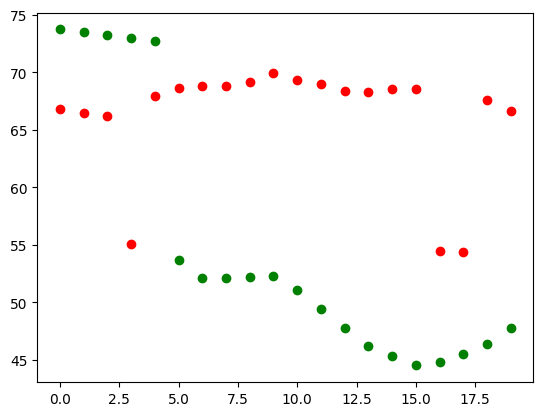

In [150]:
plt.scatter(xs,ytests,color='green')
plt.scatter(xs,ypreds,color='red')
plt.show()

In [143]:
np.arange(0,20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

# What could be wrong

1.  it could be wrong to say that the data is correlated linear, it could be exponential

2.  the data could me invalid, for example we have too many zeroes, we converted all NaN data to 0

3.  there could be a code error

4.  we add more columns



